In [140]:
library(ggplot2)

In [141]:
bb = read.table('babies.txt', header=1)
bb$smoke[bb$smoke == 0] <- "Non-smoker"
bb$smoke[bb$smoke == 1] <- "Smoker"
bb <- bb[bb$smoke!=9,]

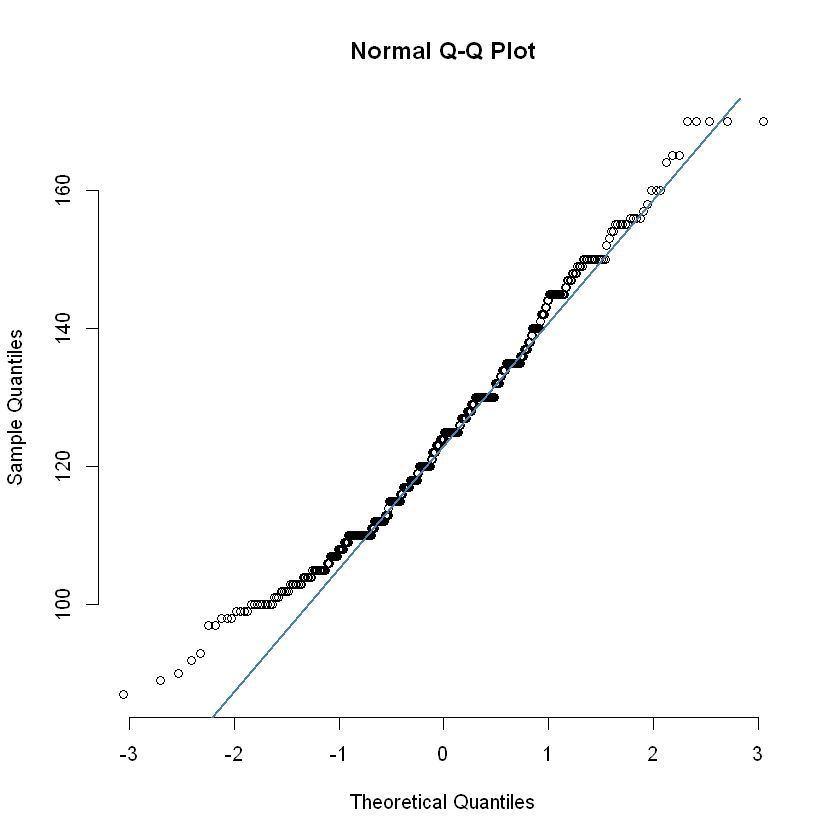

In [150]:
qqnorm(s$weight, pch = 1, frame=FALSE)
qqline(s$weight, col="steelblue", lwd=2)

In [143]:
p = ggplot(bb, aes(x=smoke, y=weight, group=smoke)) + geom_boxplot()
p + labs(title="Baby Weights in Smoking vs Non-smoking Mothers", 
         x="Mother's Smoking Status", 
         y="Baby Weight (grams)")

In [144]:
# remove first obvious outliers
bb <- bb[bb$smoke!=9,]
bb <- bb[bb$weight<750,]
bb <- bb[bb$height<75,]
bb <- bb[bb$age<50,]
bb <- bb[bb$gestation<500,]

In [145]:
# split data into non-smokers and smokers
ns<-bb[bb$smoke=="Non-smoker",]
s<-bb[bb$smoke=="Smoker",]

In [146]:
# filter smokers and non-smokers by 'box whisker' method
Q1 = summary(ns$weight)['1st Qu.']
Q3 = summary(ns$weight)['3rd Qu.']
IQR = Q3-Q1
min_cutoff = Q1 - (1.5*IQR)
max_cutoff = Q3 + (1.5*IQR)
ns<-ns[ns$weight > min_cutoff, ]
ns<-ns[ns$weight < max_cutoff, ]

Q1 = summary(s$weight)['1st Qu.']
Q3 = summary(s$weight)['3rd Qu.']
IQR = Q3-Q1
min_cutoff = Q1 - (1.5*IQR)
max_cutoff = Q3 + (1.5*IQR)
s<-s[s$weight > min_cutoff, ]
s<-s[s$weight < max_cutoff, ]

In [192]:
ns.class <- cut(ns$gestation, c(182, 224, 238, 245, 
                                252, 259, 266, 273, 280, 287, 294, 
                                301, 308, 315, 322, 500))
mean.mag <- tapply(ns$gestation, ns.class, mean)
tapply(ns$gestation, ns.class, mean)

(182,224] (224,238] (238,245] (245,252] (252,259] (259,266] (266,273] (273,280] 
 204.0000  233.1667  242.5000  249.1250  256.6190  263.3438  270.4681  277.0068 
(280,287] (287,294] (294,301] (301,308] (308,315] (315,322] (322,500] 
 283.6139  290.5520  297.5897  304.5909  312.2000  317.8750  341.2500

In [193]:
sd <- tapply(ns$gestation, ns.class, sd)
tapply(ns$gestation, ns.class, sd)

(182,224] (224,238] (238,245] (245,252] (252,259] (259,266] (266,273] (273,280] 
       NA  4.018895  2.380476  2.362908  1.657594  2.164365  2.014475  1.889033 
(280,287] (287,294] (294,301] (301,308] (308,315] (315,322] (322,500] 
 1.897785  1.915371  1.816850  2.130484  2.280351  1.356203 13.865425

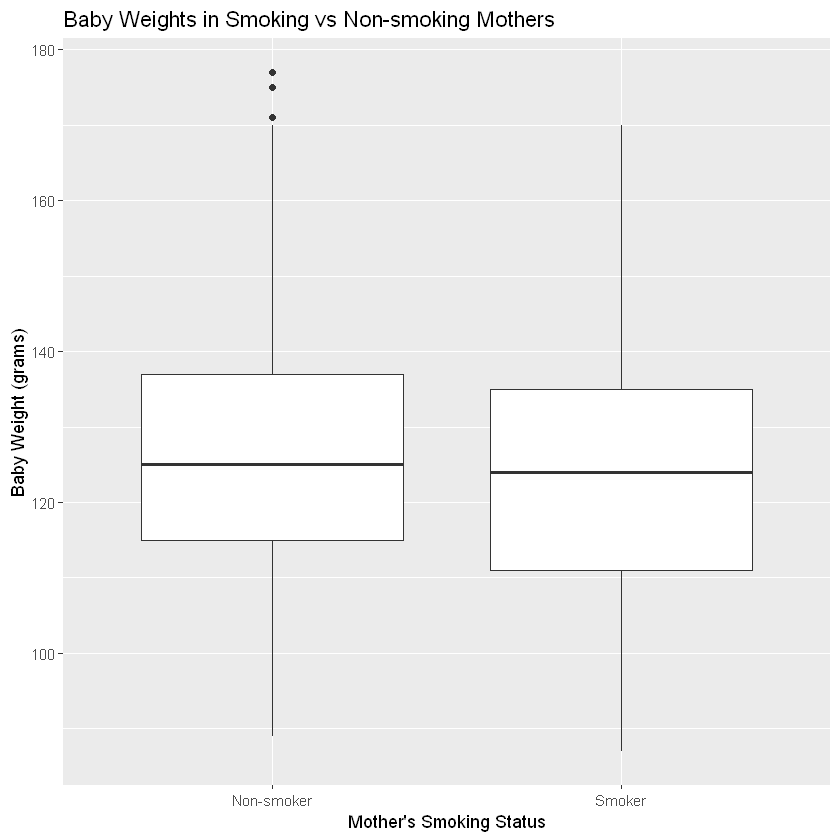

In [148]:
# plot data
bb = rbind(ns, s)
p = ggplot(bb, aes(x=smoke, y=weight, group=smoke)) + geom_boxplot()
p + labs(title="Baby Weights in Smoking vs Non-smoking Mothers", 
         x="Mother's Smoking Status", 
         y="Baby Weight (grams)")

In [19]:
cat("non-smoker\n")
cat("mean", mean(ns$weight), '\n')
cat("sd", sd(ns$weight), '\n')
cat("smoker\n")
cat("mean", mean(s$weight), '\n')
cat("sd", sd(s$weight))

non-smoker
mean 126.2363 
sd 15.98225 
smoker
mean 124.69 
sd 16.59375

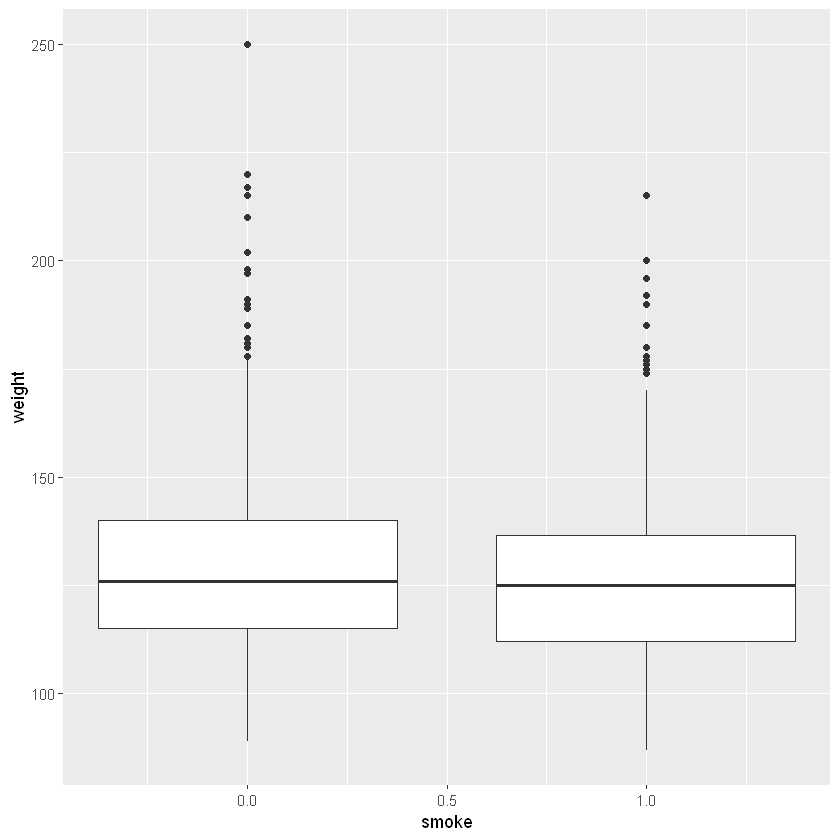

In [7]:
ggplot(bb, aes(x=smoke, y=weight, group=smoke)) + geom_boxplot()